In [ ]:
import numpy as np
import matplotlib.pyplot as plt

### Fonction `generate_and_show_maze`

La fonction `generate_and_show_maze` prend une image en entrée et génère un labyrinthe sous forme de matrice binaire, où `1` représente les murs et `0` les chemins. Elle affiche également le labyrinthe avec une grille de lignes.

#### Paramètres

- `image_path` (str) : Chemin d'accès au fichier image du labyrinthe.
- `resolution` (int) : resolution contrôle le nombre de cellules dans chaque dimension de la grille du labyrinthe.
                       -Si l'image n'est pas reconnue comme un labyrinthe bien défini (avec des murs et des chemins clairs), augmenter la resolution peut aider. Une resolution plus élevée crée une grille plus détaillée et augmente la précision de la détection des cellules de murs et de chemins.
- `cell_size` (int) : Taille de chaque cellule en pixels. Si égal à `0`, la taille sera calculée en fonction de l'image.
- `threshold` (int) : Seuil en niveaux de gris pour distinguer les murs des chemins (entre 0 et 255).




The second method is to extract a maze structure from an existing image. This method analyzes an input image, divides it into cells, and uses pixel values to determine if each cell represents a wall or a path. The function `generate_maze_from_image()` will perform this extraction.

In [5]:
def generate_and_show_maze(image_path, resolution=16, cell_size=0, threshold=128):
    """
    Génère un tableau représentant un labyrinthe à partir d'une image fournie, où les murs
    sont représentés par des 1 et les chemins par des 0, puis affiche le labyrinthe avec une grille.

    Paramètres :
    - image_path (str) : Chemin du fichier de l'image du labyrinthe.
    - resolution (int) :resolution contrôle le nombre de cellules dans chaque dimension de la grille du labyrinthe.
                       -Si l'image n'est pas reconnue comme un labyrinthe bien défini (avec des murs et des chemins clairs),
                       augmenter la resolution peut aider. Une resolution plus élevée crée une grille plus détaillée et augmente
                       la précision de la détection des cellules de murs et de chemins.
                       
    - cell_size (int) : Taille de chaque cellule en pixels. Si 0, elle sera calculée en fonction de la taille de l'image.
    - threshold (int) : Seuil de gris pour classifier les murs et les chemins (entre 0 et 255).

    Retourne :
    - np.ndarray : Un tableau numpy de dimensions (resolution, resolution) représentant le labyrinthe,
      où 1 indique un mur et 0 indique un chemin.
    """
    # Load image and convert to grayscale
    image = Image.open(image_path).convert('L')
    
    # Get image dimensions
    img_width, img_height = image.size
    
    # Calculate cell size if not provided
    if cell_size == 0:
        cell_size = min(img_width, img_height) // resolution

    # Resize the image to fit the maze grid size
    image_resized = image.resize((cell_size * resolution, cell_size * resolution))
    image_array = np.array(image_resized)

    # Initialize the maze array
    maze = np.zeros((resolution, resolution), dtype=int)

    # Process each cell in the grid
    for row in range(resolution):
        for col in range(resolution):
            # Extract the cell area
            cell = image_array[row * cell_size:(row + 1) * cell_size, col * cell_size:(col + 1) * cell_size]
            
            # Count pixels below the threshold (black or dark areas)
            black_pixels = np.sum(cell < threshold)
            white_pixels = np.sum(cell >= threshold)
            
            # Assign 1 for wall if black pixels are dominant, else 0 for path
            maze[row, col] = 1 if black_pixels > white_pixels else 0

    # Display the maze with grid lines
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.imshow(maze, cmap='binary')
    
    # Calculate the spacing for grid lines and apply 0.5 shift
    x_step = maze.shape[1] / resolution
    y_step = maze.shape[0] / resolution
    
    # Draw vertical grid lines with 0.5 offset
    for i in range(1, resolution):
        ax.axvline(i * x_step - 0.5, color='blue', linestyle='-', linewidth=0.5,alpha=0.2)
    
    # Draw horizontal grid lines with 0.5 offset
    for i in range(1, resolution):
        ax.axhline(i * y_step - 0.5, color='blue', linestyle='-', linewidth=0.5,alpha=0.2)
    
    # Invert y-axis and set title
    # plt.gca().invert_yaxis()
    plt.title(f'Maze with {resolution}x{resolution} Grid')
    plt.show()

    return maze


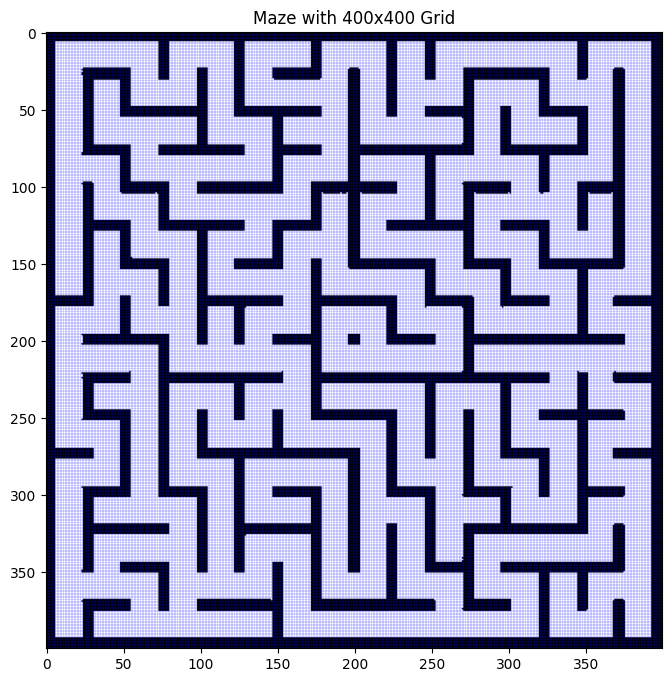

In [6]:
maze=generate_and_show_maze(image_path="cc.jpg",resolution=400,threshold=200)

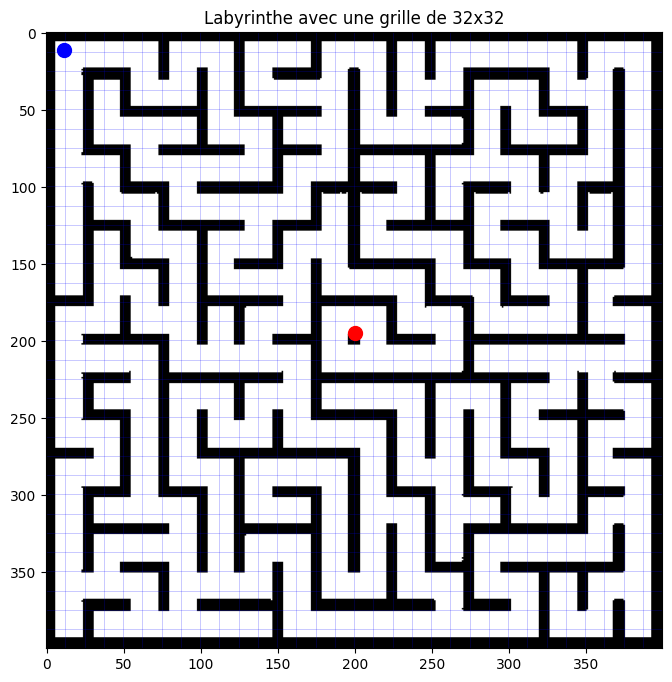

In [20]:
from mazeSolver import MazeSolver

# Define start and goal positions
start = (11,11)  # Start point near top left corner
end = (195,200)  # Goal near the center (7, 7)

# Create MazeSolver instance and find path
solver = MazeSolver(maze, start, end)
solver.display_maze(resolution=32)

In [8]:
solver.get_path(algo='astar')

[(390, 390),
 (389, 389),
 (388, 388),
 (387, 387),
 (386, 387),
 (385, 387),
 (384, 387),
 (383, 387),
 (382, 387),
 (381, 387),
 (380, 387),
 (379, 387),
 (378, 387),
 (377, 387),
 (376, 387),
 (375, 386),
 (374, 385),
 (373, 384),
 (372, 383),
 (371, 382),
 (370, 381),
 (369, 380),
 (368, 379),
 (367, 378),
 (366, 377),
 (365, 376),
 (364, 376),
 (363, 376),
 (362, 376),
 (361, 376),
 (360, 376),
 (359, 376),
 (358, 376),
 (357, 376),
 (356, 376),
 (355, 376),
 (354, 376),
 (353, 376),
 (352, 376),
 (351, 376),
 (350, 376),
 (349, 376),
 (348, 376),
 (347, 376),
 (346, 376),
 (345, 376),
 (344, 376),
 (343, 376),
 (342, 376),
 (341, 376),
 (340, 376),
 (339, 376),
 (338, 376),
 (337, 376),
 (336, 376),
 (335, 376),
 (334, 376),
 (333, 376),
 (332, 376),
 (331, 376),
 (330, 376),
 (329, 376),
 (328, 376),
 (327, 376),
 (326, 376),
 (325, 376),
 (324, 376),
 (323, 376),
 (322, 376),
 (321, 376),
 (320, 376),
 (319, 375),
 (318, 374),
 (318, 373),
 (318, 372),
 (318, 371),
 (318, 370),

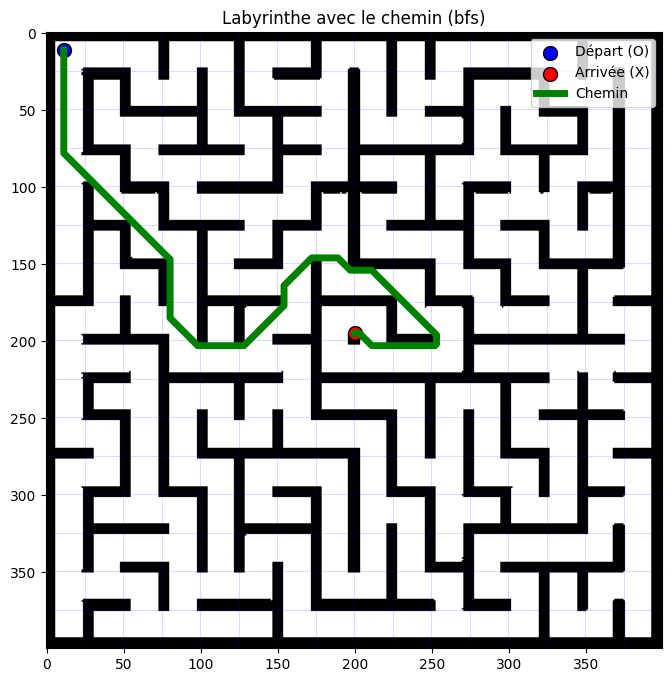

In [21]:
# Affiche le chemin trouvé par l'algorithme A* sur le labyrinthe.
# - linewidth=5 : définit l'épaisseur de la ligne représentant le chemin à 5 pixels.
solver.display_path(linewidth=5, resolution=16,algo="bfs")
